<a href="https://colab.research.google.com/github/alexandergribenchenko/Acamica_Proyecto_02/blob/main/DS_Proyecto_01_Entregado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con mis modificaciones de Colab. 

# Proyecto: Análisis de mercado inmobiliario

<h3>(Acámica - DS online 40 - Proyecto 01 - Alexander Ortega)</h3>

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### Respuesta 1.

Acorde a la experiencia común y a la bibliografía existen 6 grupos de factores comunes relacionados con la estimación del precio de los inmuebles: ubicación, tipo de propiedad, condiciones de la vivienda, proporciones de la vivienda, instalaciones y sitios cercanos.

Algunos de ellos se presentan en nuestro dataset (resaltados en verde) y algunos de ellos se encuentran en carencia en el mismo (resaltados en rojo):

![image.png](attachment:0d1910a8-2a30-4642-8c8e-daf04c588c24.png)

**Información con que ya cuenta en dataset:** básicamente el dataset centra su información en la ubicación, el tipo de propiedades  y en las proporciones de la vivienda (información asociada a su tamaño y a su distribución en espacios y subespacios). 

**Información que no contempla el dataset (también muy relevante para un modelo de estimación de precio):**  Condiciones de vivienda (antigüedad, deterioro, remodelaciones) , instalaciones (espacios comunes, zonas verdes, zonas deportivas, parqueaderos, etc) y sitios cercanos (sitios de interés, supermercados, gimnasios, transporte público).

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
# Librerirías para importar la información y para el tratamiento numérico de las variables
import pandas as pd 
import numpy as np

# Librerias para la graficación y el Análisis Exploratorio de Datos (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Librerias para reconocimiento de caracteres
from string import ascii_letters

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
# Cargamos el dataset
df_properati=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
# Obtenemos e imprimimos la cantidad de filas y de columnas que tiene el dataset
a,b=df_properati.shape
print('Cantidad de filas:',a)
print('Cantidad de columnas:',b)

Cantidad de filas: 146660
Cantidad de columnas: 19


In [ ]:
# Imprimimos las 5 primeras instancias del dataset para darnos una idea de su contenido
df_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# Como buena practica, evaluamos inicialmente toda la información general del dataset 
# (cantidad de filas, cantidad de columnas, nombres que tienen asignadas las columnas, 
#  cantidad de valores no nulos por columna, tipo de variable asociada a cada columna,
#  conteo del total de los tipos de varibles en el dataframe, uso en memoria, etc.)
df_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [ ]:
# Si deseo saber explícita y unicamante el nombre de las columnas aplico el método columns de pandas
list(df_properati.columns)

['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

In [ ]:
# Me permite conocer cuantos campos vacios (valores faltantes, NaN) hay por cada columna
df_properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
# Podemos obtener de manera simultanea todos los tipos de valores que toma la variable property_type,
# y adicionalmente hacer un conteo de cuantas instancias hay por cada tipo en el dataset
df_properati.property_type.value_counts(dropna=False, sort=True, ascending=False)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [ ]:
# Si queremos obtener únicamante el tipo los 10 tipos de propiedad que tiene el dataset podemos hacer:
np.unique(df_properati['property_type'])

array(['Casa', 'Casa de campo', 'Cochera', 'Departamento', 'Depósito',
       'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH'], dtype=object)

In [ ]:
# Opción alternativa si queremos que este resultado sea un dataframe de pandas
data_tipo=pd.DataFrame(df_properati.groupby(['property_type'],sort=True)['property_type'].count().reset_index(name='Total'))
data_tipo.sort_values(by=['Total'],ascending=False, inplace=True, ignore_index=True)
data_tipo

,property_type,Total
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265
9,Cochera,259


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Departamento'),
  Text(1, 0, 'Casa'),
  Text(2, 0, 'PH'),
  Text(3, 0, 'Lote'),
  Text(4, 0, 'Oficina'),
  Text(5, 0, 'Otro'),
  Text(6, 0, 'Local comercial'),
  Text(7, 0, 'Casa de campo'),
  Text(8, 0, 'Depósito'),
  Text(9, 0, 'Cochera')])

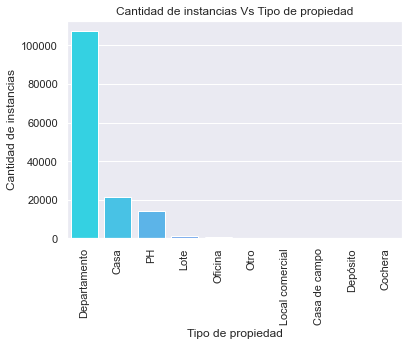

In [ ]:
# Visualización (vertical) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
sns.countplot(data = df_properati, x = 'property_type', order = df_properati['property_type'].value_counts().index, palette='cool')
plt.title('Cantidad de instancias Vs Tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de instancias')
plt.xticks(rotation=90)

Text(0, 0.5, 'Tipo de propiedad')

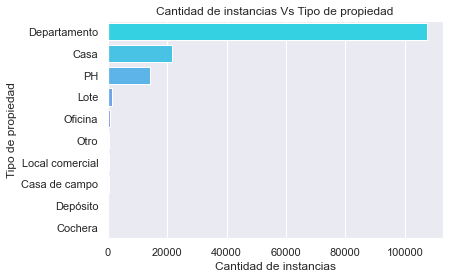

In [ ]:
# Visualización (horizontal) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
sns.countplot(data = df_properati, y = 'property_type', order = df_properati['property_type'].value_counts().index, palette='cool')
plt.title('Cantidad de instancias Vs Tipo de propiedad')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Tipo de propiedad')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

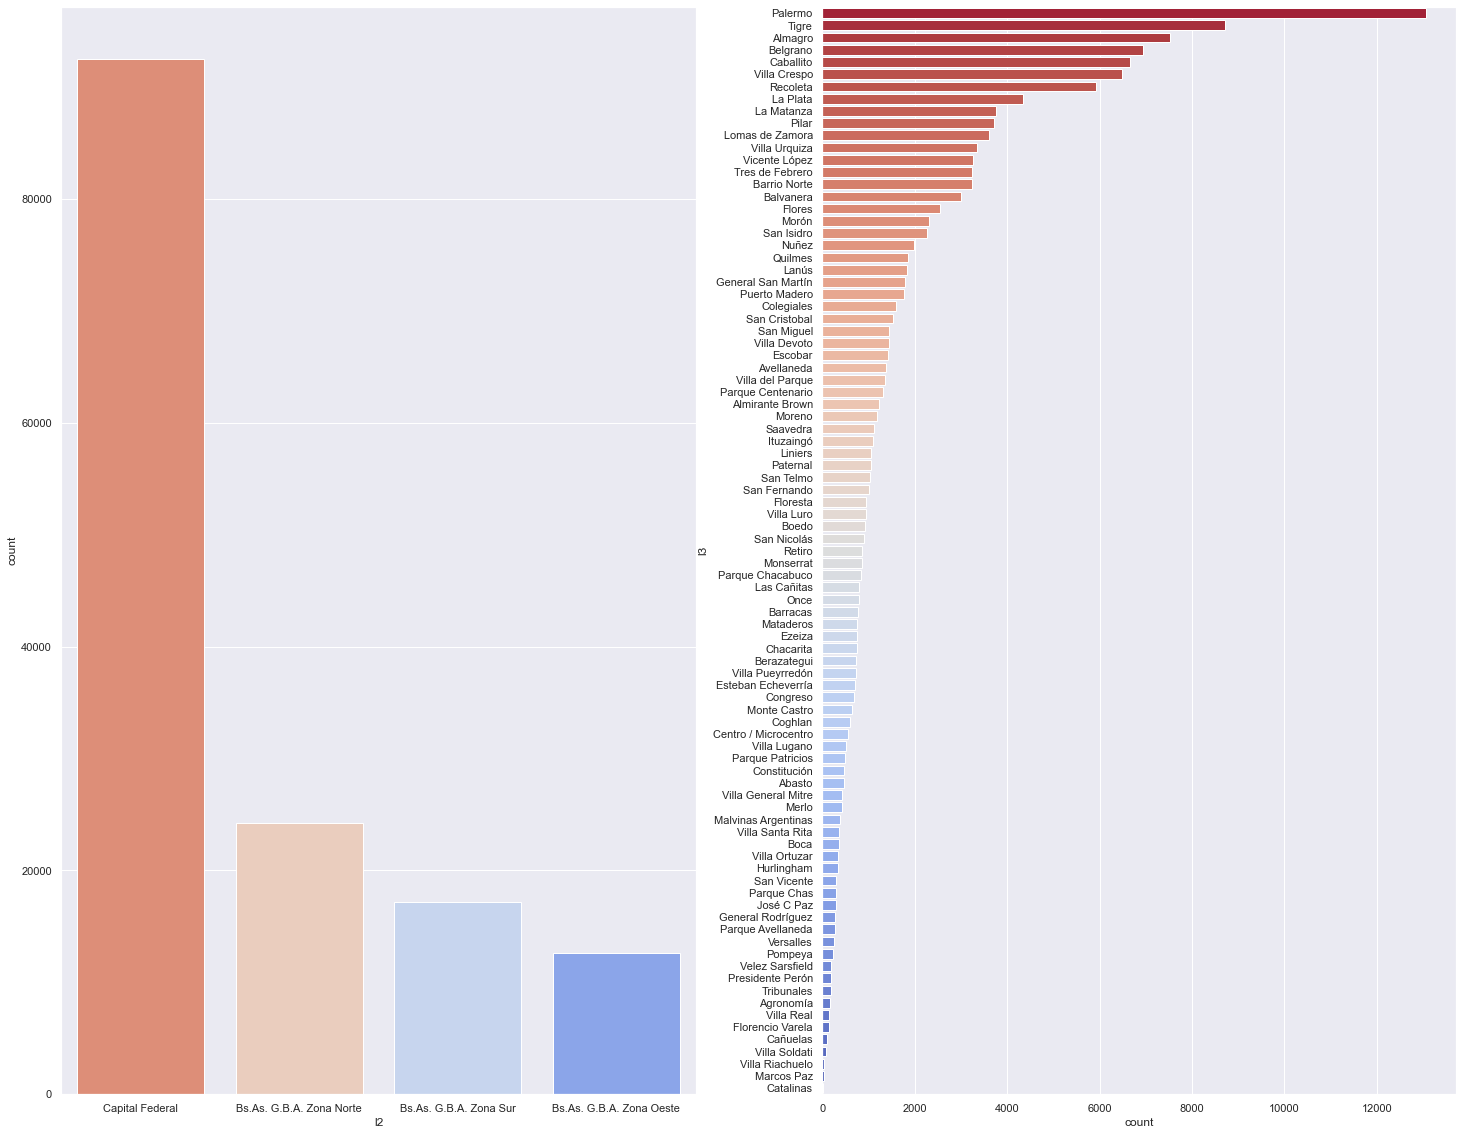

In [ ]:
# Visualización (vertical) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
fig, ax =plt.subplots(1,2)
sns.countplot(ax=ax[0], data = df_properati, x = 'l2', order = df_properati['l2'].value_counts().index, palette='coolwarm_r')
sns.countplot(ax=ax[1], data = df_properati, y = 'l3', order = df_properati['l3'].value_counts().index, palette='coolwarm_r')
fig.set_size_inches(25, 20)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
df_properati_filtrado=df_properati[(df_properati.l2 == 'Capital Federal') & (df_properati.property_type.isin(['Departamento','Casa','PH']))]
print(df_properati_filtrado.shape)

(91485, 19)


In [ ]:
df_properati_filtrado.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### Respuesta 6D. Restricción: surface_covered y surface_total

**Enunciado:** 

**6. Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

D. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.

**Respuesta:** Aunque la restricción aparece en el literal 6.D, es la primera restricción que aplicaremos pues nos permitirá limpiar el dataframe depurado los registros que no presentan un comportamiento logico respecto a sus areas (el area cubierta debe ser siempre menor o igual que el area total).

In [ ]:
# Hacemos una copia del dataframe para trabajar con un nuevo dataframe con nuevos indices
df_properati_filtrado_02=df_properati_filtrado.reset_index(drop=True)
df_properati_filtrado_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       91485 non-null  object 
 1   end_date         91485 non-null  object 
 2   created_on       91485 non-null  object 
 3   lat              86951 non-null  float64
 4   lon              86937 non-null  float64
 5   l1               91485 non-null  object 
 6   l2               91485 non-null  object 
 7   l3               91485 non-null  object 
 8   rooms            91485 non-null  float64
 9   bedrooms         91485 non-null  float64
 10  bathrooms        89314 non-null  float64
 11  surface_total    82568 non-null  float64
 12  surface_covered  82250 non-null  float64
 13  price            91485 non-null  float64
 14  currency         91485 non-null  object 
 15  title            91485 non-null  object 
 16  description      91485 non-null  object 
 17  property_typ

In [ ]:
# Encontramos los indices de los elementos que no cumplen en el dataframe con la restricción
index_to_drop=df_properati_filtrado_02[df_properati_filtrado_02.surface_covered>df_properati_filtrado_02.surface_total].index
index_to_drop

Int64Index([  386,   590,   635,   869,   942,  1012,  1126,  1216,  1247,
             2056,
            ...
            82174, 82419, 84150, 84286, 88151, 90843, 90848, 90911, 90965,
            90968],
           dtype='int64', length=760)

In [ ]:
# Dropeamos del dataframe los registros que no cumplen en el dataframe con la restricción (760 registros)
df_properati_filtrado_02=df_properati_filtrado_02.drop(index_to_drop)

In [ ]:
# Generamos un reset de los indices para trabajar con nuevos indices
df_properati_filtrado_02=df_properati_filtrado_02.reset_index(drop=True)
df_properati_filtrado_02

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90720,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
90721,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
90722,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
90723,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [ ]:
# Visulizamos las propiedades del nuevo dataframe de interes
df_properati_filtrado_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90725 entries, 0 to 90724
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       90725 non-null  object 
 1   end_date         90725 non-null  object 
 2   created_on       90725 non-null  object 
 3   lat              86196 non-null  float64
 4   lon              86182 non-null  float64
 5   l1               90725 non-null  object 
 6   l2               90725 non-null  object 
 7   l3               90725 non-null  object 
 8   rooms            90725 non-null  float64
 9   bedrooms         90725 non-null  float64
 10  bathrooms        88562 non-null  float64
 11  surface_total    81808 non-null  float64
 12  surface_covered  81490 non-null  float64
 13  price            90725 non-null  float64
 14  currency         90725 non-null  object 
 15  title            90725 non-null  object 
 16  description      90725 non-null  object 
 17  property_typ

Hasta este punto ya tenemos un dataframe que esta filtrado por zona (la zona que presenta la mayor cantidad de registros: Capital Federal), por tipo de propiedad (los 3 tipos de popiedad que presentan la mayor cantidad de registros: Departamento, Casa, PH), y a su vez filtrada por cumplimiento de la condición de que su superficie total debe ser mayor o igual al la superficie cubierta. 

Este dataframe es el que en este punto lleva por nombre df_properati_filtrado_02.

### Respuesta 6A. Estadísticos.

**Enunciado:** 

**6. Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

A. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

**Respuesta:** Obtendremos los estadísticos mas representarivos del conjunto de variables númericas tanto de manera tabular como gráfica.

In [ ]:
# Podemos obtener los estadisticos mas representativos del dataframe de manera tabular
# para el conjunto de variables de interes que fueron sugeridas. 
# Dado que las 6 variables sugeridas son numericas, podemos emplear la función describe
df_6A=df_properati_filtrado_02[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]
df_6A.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90725.000000,90725.000000,88562.000000,81808.000000,81490.00000,9.072500e+04
mean,2.960904,1.957718,1.560060,112.757909,92.18887,2.597473e+05
std,1.304515,1.067473,0.858432,985.155870,768.85138,3.229361e+05
min,1.000000,0.000000,1.000000,12.000000,1.00000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.00000,1.216350e+05
50%,3.000000,2.000000,1.000000,71.000000,63.00000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.00000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.00000,3.243423e+07


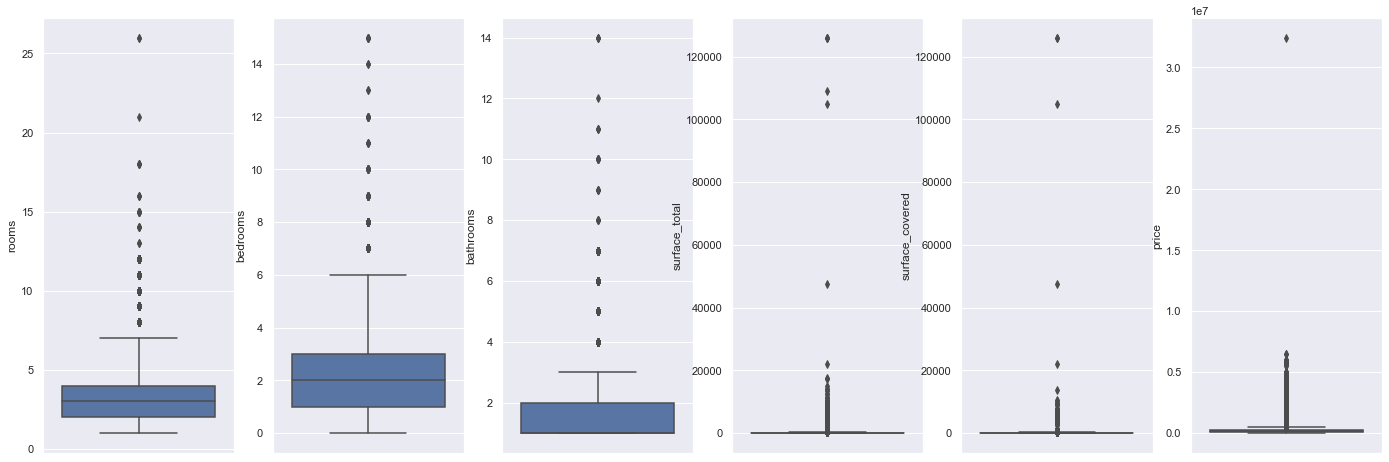

In [ ]:
# Podemos visualizar los estadísticos mas representativos del dataframe de manera gráfica
fig, ax =plt.subplots(1,6)
sns.boxplot(data = df_6A, y = "rooms", ax=ax[0])
sns.boxplot(data = df_6A, y = "bedrooms", ax=ax[1])
sns.boxplot(data = df_6A, y = "bathrooms", ax=ax[2])
sns.boxplot(data = df_6A, y = "surface_total", ax=ax[3])
sns.boxplot(data = df_6A, y = "surface_covered", ax=ax[4])
sns.boxplot(data = df_6A, y = "price", ax=ax[5])
fig.set_size_inches(24, 8)

In [ ]:
# Definiremos una función que nos permitirá obtener de manera tabular la distribución 
# para cualquier tipo de variable. Tiene como entrada en dataframe que queremos analizar y 
# su columna de interes.

def df_count_values(df_in, column):
    df_counts=df_in[column].value_counts(dropna=False,sort=False).to_frame().reset_index()
    df_counts=df_counts.rename(columns={'index':column, column:'cantidad' }).sort_values([column])
    df_counts=df_counts.reset_index(drop=True)
    df_out=df_counts
    return df_out

In [ ]:
# Haciendo el llamado de la función evaluamos de manera tabular la distribución que toma la variable rooms.
df_count_rooms=df_count_values(df_6A,'rooms')
df_count_rooms

,rooms,cantidad
0,1.0,8763
1,2.0,27038
2,3.0,28129
3,4.0,18286
4,5.0,5396
5,6.0,1795
6,7.0,684
7,8.0,397
8,9.0,74
9,10.0,77


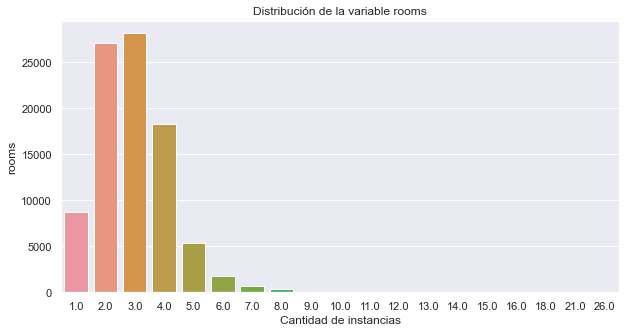

In [ ]:
# Con el dataframe anterior evaluamos de manera grafica la distribución que toma la variable rooms.
plt.figure(figsize=(10, 5))
sns.barplot(y='cantidad',x='rooms',data=df_count_rooms)
plt.title('Distribución de la variable rooms')
plt.xlabel('Cantidad de instancias')
plt.ylabel('rooms')
plt.show()

In [ ]:
# Distribución que toma la variable bedrooms (Tabular)
df_count_bedrooms=df_count_values(df_6A,'bedrooms')
df_count_bedrooms

,bedrooms,cantidad
0,0.0,2217
1,1.0,33799
2,2.0,28908
3,3.0,19640
4,4.0,4788
5,5.0,809
6,6.0,305
7,7.0,174
8,8.0,33
9,9.0,16


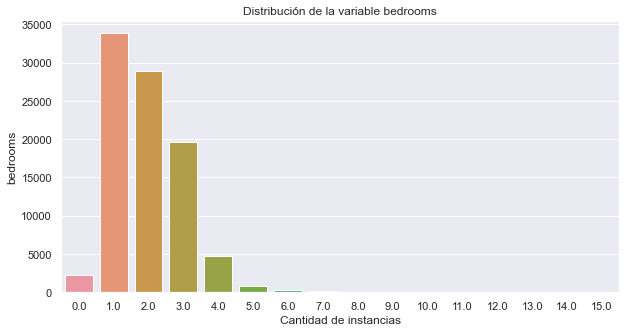

In [ ]:
# Distribución que toma la variable bedrooms (Gráfica)
plt.figure(figsize=(10, 5))
sns.barplot(y='cantidad',x='bedrooms',data=df_count_bedrooms)
plt.title('Distribución de la variable bedrooms')
plt.xlabel('Cantidad de instancias')
plt.ylabel('bedrooms')
plt.show()

In [ ]:
# Distribución que toma la variable bedrooms (Tabular)
df_count_bathrooms=df_count_values(df_6A,'bathrooms')
df_count_bathrooms

,bathrooms,cantidad
0,1.0,54290
1,2.0,23439
2,3.0,7581
3,4.0,2345
4,5.0,702
5,6.0,145
6,7.0,38
7,8.0,4
8,9.0,4
9,10.0,7


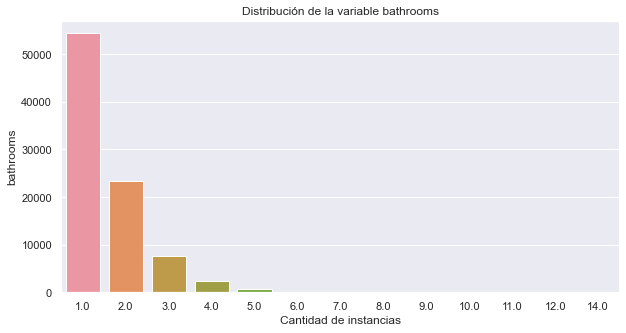

In [ ]:
# Distribución que toma la variable bathrooms (Gráfica)
plt.figure(figsize=(10, 5))
sns.barplot(y='cantidad',x='bathrooms',data=df_count_bathrooms)
plt.title('Distribución de la variable bathrooms')
plt.xlabel('Cantidad de instancias')
plt.ylabel('bathrooms')
plt.show()

Dado que las variables rooms, bedrooms y bathrooms son categoricas (o "numericas" pero con valores discretos) hemos evaluado sus distribuciones empleando barplots. 

Para las variables que nos restan por analizar (surface_total, surface_covered, price) generaremos historgramas dado que sus distribuciones son continuas.

(Veremos que su representación no es muy útil mientras no generemos un filtrado, que se podra evidenciar en literales posteriores del ejercicio 6)

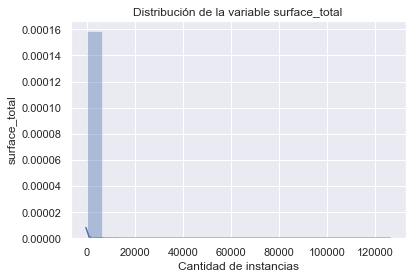

In [ ]:
# Distribución que toma la variable surface_total (Gráfica)
sns.distplot(df_6A['surface_total'], bins = 20, hist=True, kde=True, rug=False, norm_hist=True)
plt.title('Distribución de la variable surface_total')
plt.xlabel('Cantidad de instancias')
plt.ylabel('surface_total')
plt.show()

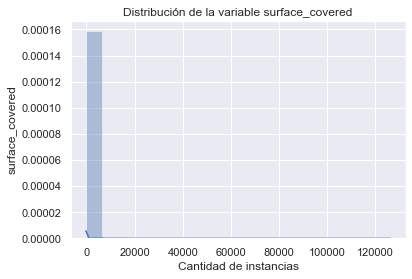

In [ ]:
# Distribución que toma la variable surface_covered, (Gráfica)
sns.distplot(df_6A['surface_covered'], bins = 20, hist=True, kde=True, rug=False, norm_hist=True)
plt.title('Distribución de la variable surface_covered')
plt.xlabel('Cantidad de instancias')
plt.ylabel('surface_covered')
plt.show()

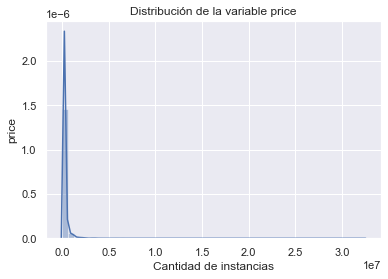

In [ ]:
# Distribución que toma la variable price (Gráfica)
sns.distplot(df_6A['price'], bins = 50, hist=True, kde=True, rug=False)
plt.title('Distribución de la variable price')
plt.xlabel('Cantidad de instancias')
plt.ylabel('price')
plt.show()

### Respuesta 6B y 6C. Comportamiento variable surface_total.

**Enunciado:** 

**6. Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

B. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

C. Lo mismo ocurre con valores de superficie total muy chico.

**Respuesta:** Generaremos un filtrado del dataframe respecto a la variable surface_total.

In [ ]:
# Recodemos el contenido de nuestra mátriz ya filtrada respecto a los criterios de lso numerales anteriores
df_6A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90725 entries, 0 to 90724
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            90725 non-null  float64
 1   bedrooms         90725 non-null  float64
 2   bathrooms        88562 non-null  float64
 3   surface_total    81808 non-null  float64
 4   surface_covered  81490 non-null  float64
 5   price            90725 non-null  float64
 6   property_type    90725 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.8+ MB


<AxesSubplot:ylabel='surface_total'>

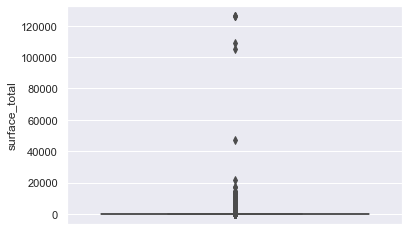

In [ ]:
# Evaluemos de manera independiente el comportamiento de la variable surface_total
sns.boxplot(data = df_6A, y = "surface_total")

In [ ]:
# Evaluemos el cuales son sus percentiles para emplearlos como un criterio de filtrado
print('percentil 1%: ', df_6A['surface_total'].quantile(0.01))
print('percentil 99%: ', df_6A['surface_total'].quantile(0.99))

percentil 1%:  26.0
percentil 99%:  431.0


In [ ]:
# Emplearemos dichos valores como valores de filtrado para tener un dataframe con valores 
# de registros más representativos de todo el conjunto de datos
menor_percentil=0.01
mayor_percentil=0.99

df_6B=df_6A[(df_6A['surface_total']>=df_6A['surface_total'].quantile(menor_percentil))&
                (df_6A['surface_total']<=df_6A['surface_total'].quantile(mayor_percentil))
           ].reset_index(drop=True)

df_6B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80293 entries, 0 to 80292
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            80293 non-null  float64
 1   bedrooms         80293 non-null  float64
 2   bathrooms        79444 non-null  float64
 3   surface_total    80293 non-null  float64
 4   surface_covered  79797 non-null  float64
 5   price            80293 non-null  float64
 6   property_type    80293 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.3+ MB


<AxesSubplot:ylabel='surface_total'>

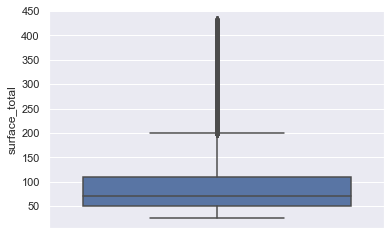

In [ ]:
#Nueva distribución que toma la variable surface_total tras el filtrado (Histograma)
sns.boxplot(data = df_6B, y = "surface_total")

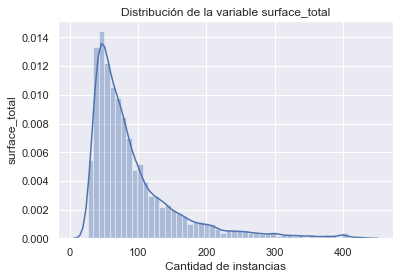

In [ ]:
#Nueva distribución que toma la variable surface_total tras el filtrado (Histograma)
sns.distplot(df_6B['surface_total'], bins = 50, hist=True, kde=True, rug=False, norm_hist=True)
plt.title('Distribución de la variable surface_total')
plt.xlabel('Cantidad de instancias')
plt.ylabel('surface_total')
plt.show()

Emplearemos como criterio de selección los valores que se encuentren entre los percentiles 1 y 99. Esto nos permite seguir conservando los registros más representativos de todo el dataframe aún cuando se extraigan de el algunos registos  con surface_total muy pequeños o muy grandes en relación a la muestra general del dataframe.

El dataframe de salida tras el porceso de filtrado tiene como nombre df_6B.

### Respuesta 6E. Comportamiento variable price.

**Enunciado:** 

**6. Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

**Respuesta:** Generaremos un filtrado del dataframe respecto a la variable price.

In [ ]:
# Recodemos el contenido de nuestra mátriz ya filtrada respecto a los criterios de los numerales anteriores
df_6B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80293 entries, 0 to 80292
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            80293 non-null  float64
 1   bedrooms         80293 non-null  float64
 2   bathrooms        79444 non-null  float64
 3   surface_total    80293 non-null  float64
 4   surface_covered  79797 non-null  float64
 5   price            80293 non-null  float64
 6   property_type    80293 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.3+ MB


<AxesSubplot:ylabel='price'>

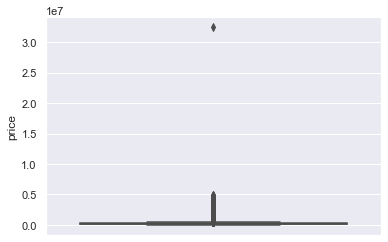

In [ ]:
# Evaluemos de manera independiente el comportamiento de la variable price
sns.boxplot(data = df_6B, y = "price")

In [ ]:
# Evaluemos el cuales son sus percentiles para emplearlos como un criterio de filtrado
print('percentil 1%: ', df_6A['price'].quantile(0.01))
print('percentil 99%: ', df_6A['price'].quantile(0.99))

percentil 1%:  58000.0
percentil 99%:  1600000.0


In [ ]:
# Emplearemos dichos valores como valores de filtrado para tener un dataframe con valores 
# de registros más representativos de todo el conjunto de datos
menor_percentil=0.01
mayor_percentil=0.99

df_6E=df_6B[(df_6B['price']>=df_6B['price'].quantile(menor_percentil))&
                (df_6B['price']<=df_6B['price'].quantile(mayor_percentil))
           ].reset_index(drop=True)

df_6E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78714 entries, 0 to 78713
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            78714 non-null  float64
 1   bedrooms         78714 non-null  float64
 2   bathrooms        77878 non-null  float64
 3   surface_total    78714 non-null  float64
 4   surface_covered  78236 non-null  float64
 5   price            78714 non-null  float64
 6   property_type    78714 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.2+ MB


<AxesSubplot:ylabel='price'>

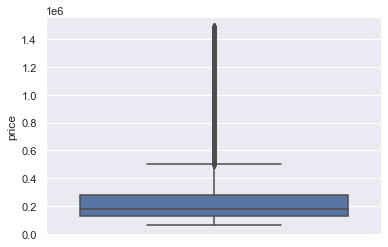

In [ ]:
# Nueva distribución que toma la variable price tras el filtrado (Histograma)
sns.boxplot(data = df_6E, y = "price")

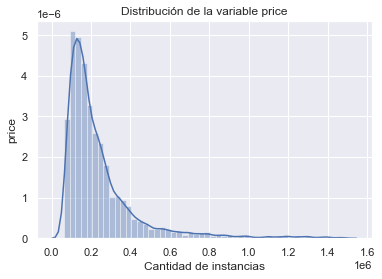

In [ ]:
#Nueva distribución que toma la variable price tras el filtrado (Histograma)
sns.distplot(df_6E['price'], bins = 50, hist=True, kde=True, rug=False, norm_hist=True)
plt.title('Distribución de la variable price')
plt.xlabel('Cantidad de instancias')
plt.ylabel('price')
plt.show()

Emplearemos como criterio de selección los valores que se encuentren entre los percentiles 1 y 99. Esto nos permite seguir conservando los registros más representativos de todo el dataframe aún cuando se extraigan de el algunos registos con price muy pequeños o muy grandes en relación a la muestra general del dataframe.

El dataframe de salida tras el porceso de filtrado tiene como nombre df_6E.

### Respuesta 6F. Función pairplot en Seaborn.

**Enunciado:** 

**6. Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

F. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

**Respuesta:** Aplicamos la función pairplot.

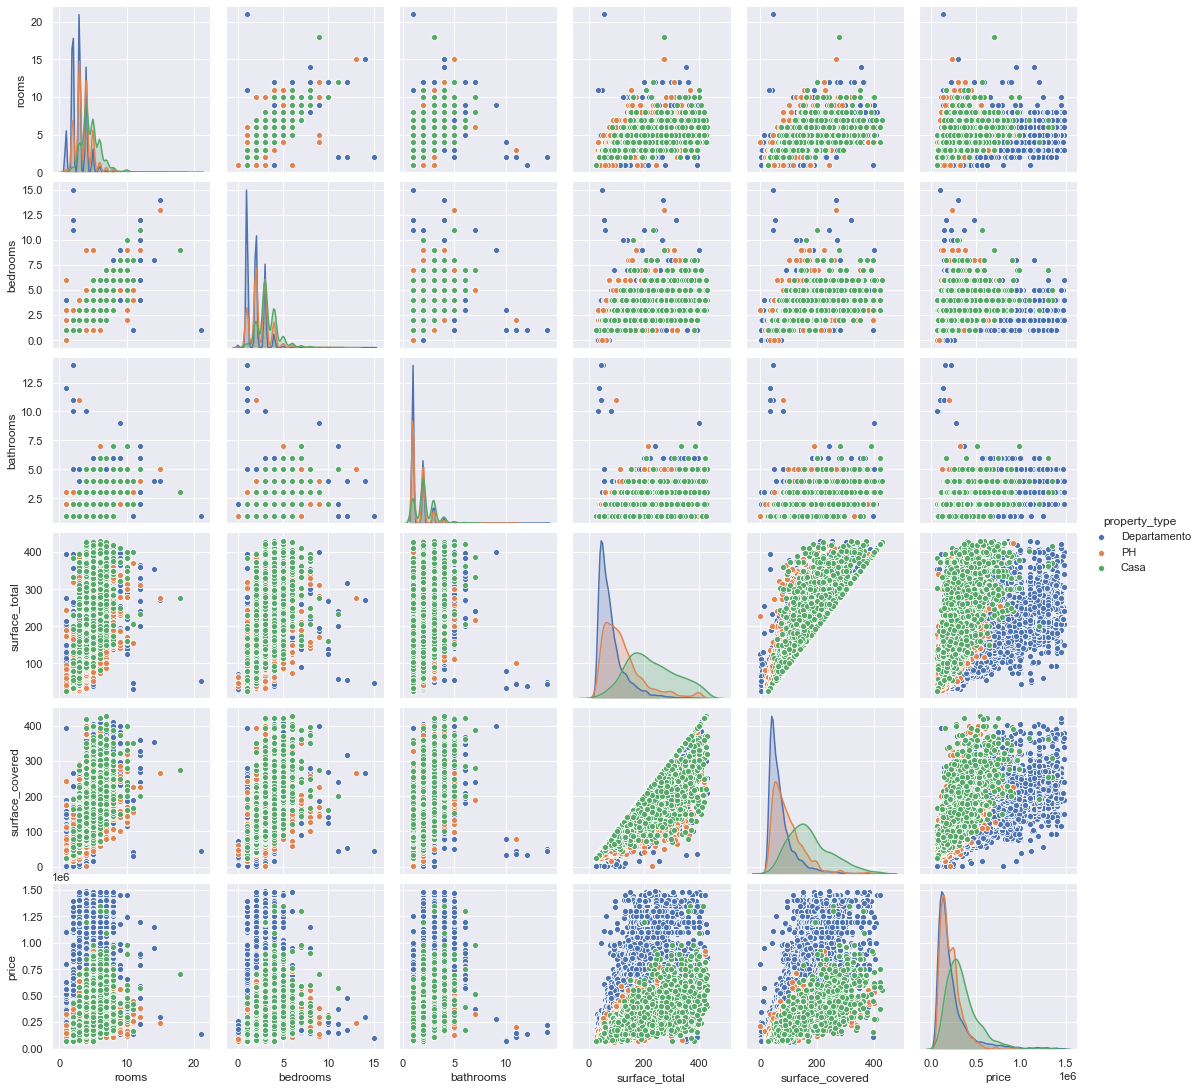

In [ ]:
sns.pairplot(df_6E, hue = 'property_type')

A partir del pairplot de Seaborn podemos en una primera mirada superficial que hay 2 tipos de conjuntos que parecen tener mayor relación con la variable precio: 
1. Por una parte se ve que en las propiedades tipo departamento los precios son en general mucho mayores, a los de los PH o las casas aun cuando el número de rooms o bedromms sea el mismo.
2. Esta misma relación se cumple si tenemos en cuenta las variables superficie total y superficie cubierta. Adicional a ello, aunque las variables no tienen un comportamiento explícitamente lineal, si son en apariencia las que podrían presentar una mayor correlación con la variable precio.

![image.png](attachment:3a4b801d-9660-4003-a500-b2c080560c7a.png)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

### Respuesta 7. Correlaciones.

Nuestro analisis presentará la siguiente estructura: 

Para cada uno de los subgrupos de tipos de propiedad (4 en total: todas las propiedades, Departamento, Casa, PH) se presentarán 3 elementos que daran cuenta de la correlación entre sus variables:
1. Diagramas de cajas: Nos permitirán visualizar de manera gráfica de la distribución del precio respecto a cada una de las 6 variables de interés
2. Matriz de correlación: Nos permite visualizar de manera gráfica la correlación entre cada una de las variables de interés.
3. Lista de correlación: Nos permite visualizar tabularmente, organizada de mayor a menor la correlación del precio con cada una de las 6 variables de interés.

Al final de toda la sección se presenta de manera conjunta un análisis de las características más importantes de la información encontrada.


In [ ]:
### Tipo de propiedad: Todos los tipos de propiedad

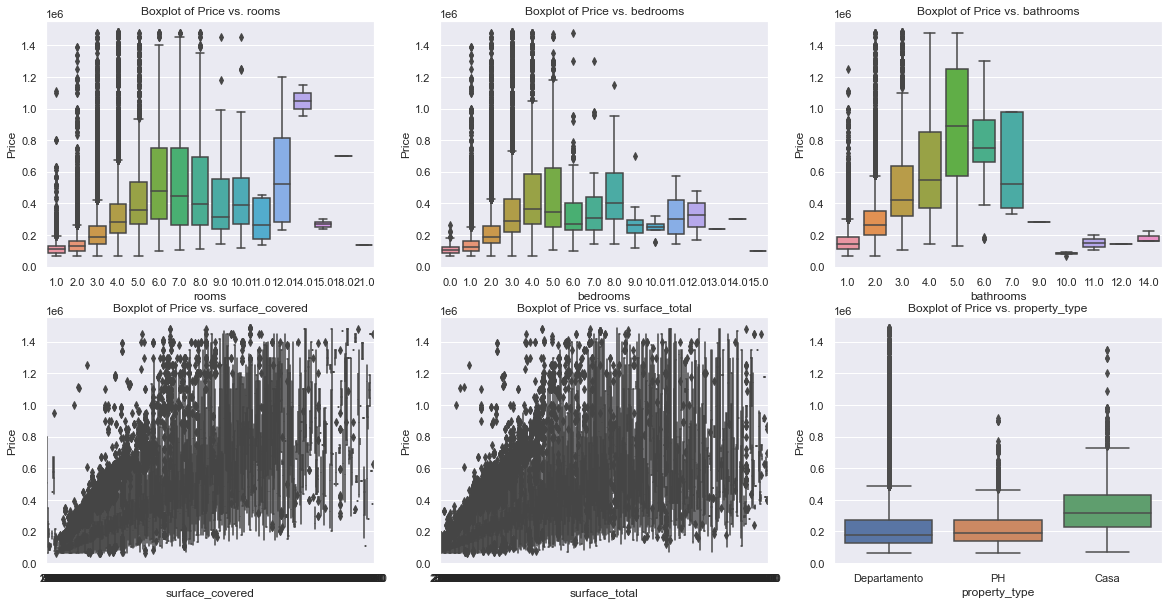

In [ ]:
# Visualización gráfica de la distribución del precio respecto las 6 variables de interés
# (Diagramas de cajas)

plt.figure(figsize=(20,10))
vars_to_plot = ['rooms','bedrooms','bathrooms','surface_covered', 'surface_total', 'property_type']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = var, y='price', data = df_6E)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

<AxesSubplot:>

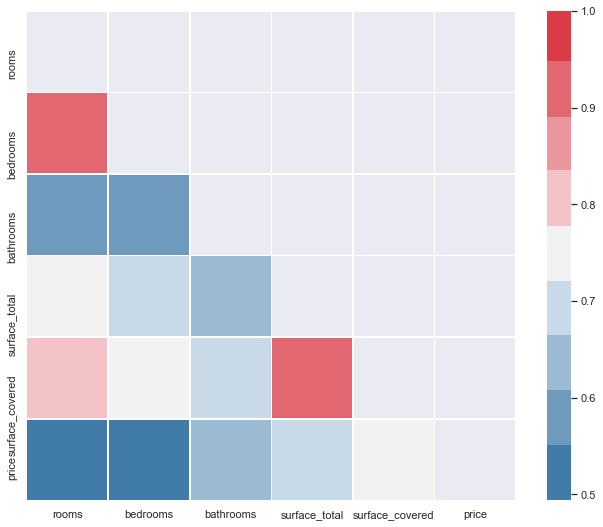

In [ ]:
# Código provisto por la documentación oficial de seaborn para 
# la visualización gráfica de la correlación de un dataframe específico

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_6E.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.75,
            square=True, linewidths=0.5, cbar_kws={"shrink": 1})

In [ ]:
# Listado de correlación en relación al precio
corr    = df_6E.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)

price              1.000000
surface_covered    0.759625
surface_total      0.698501
bathrooms          0.659243
rooms              0.529757
bedrooms           0.493860
Name: price, dtype: float64

In [ ]:
corr['price'][neg_cor].sort_values()

Series([], Name: price, dtype: float64)

In [ ]:
### Tipo de propiedad: Departamento

In [ ]:
# Dataframe específico para las propiedades tipo departamento
df_E7_Dep=df_6E[df_6E.property_type=='Departamento']    

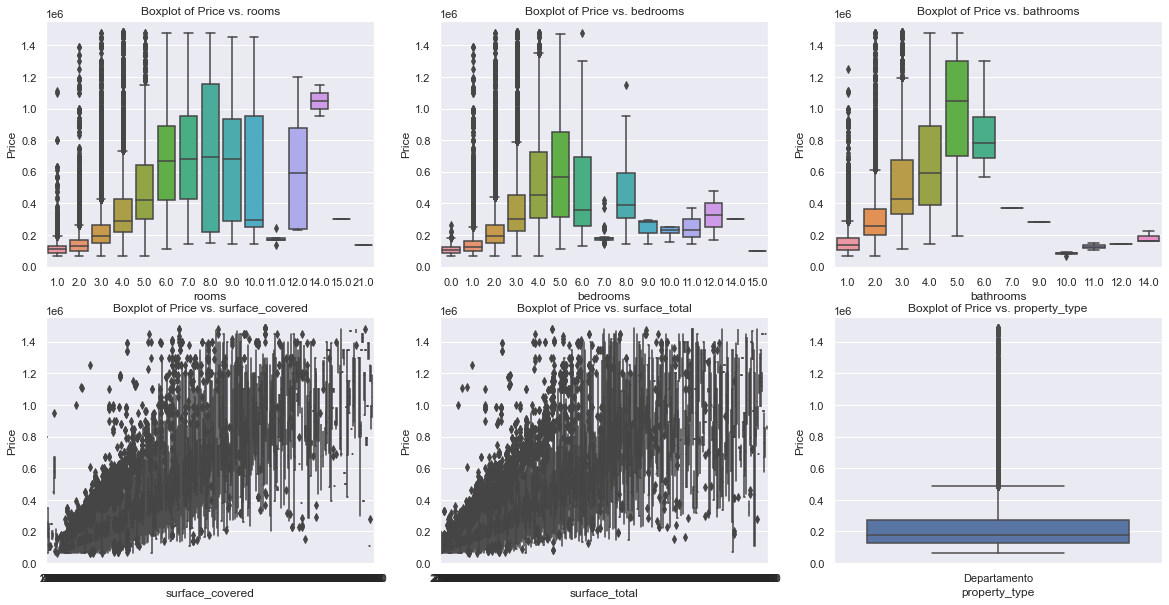

In [ ]:
# Visualización gráfica de la distribución del precio respecto las 6 variables de interés
# (Diagramas de cajas)

plt.figure(figsize=(20,10))
vars_to_plot = ['rooms','bedrooms','bathrooms','surface_covered', 'surface_total', 'property_type']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = var, y='price', data = df_E7_Dep)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

<AxesSubplot:>

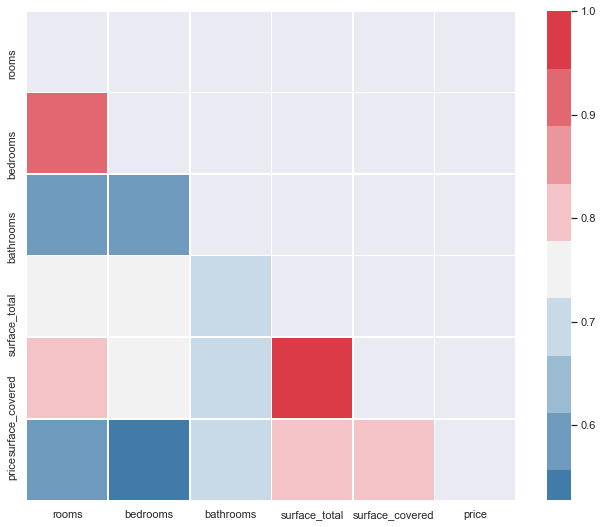

In [ ]:
# Código provisto por la documentación oficial de seaborn para 
# la visualización gráfica de la correlación de un dataframe específico

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_E7_Dep.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.75,
            square=True, linewidths=0.5, cbar_kws={"shrink": 1})

In [ ]:
# Listado de correlación en relación al precio
corr    = df_E7_Dep.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)

price              1.000000
surface_covered    0.827098
surface_total      0.807918
bathrooms          0.677862
rooms              0.563842
bedrooms           0.527381
Name: price, dtype: float64

In [ ]:
corr['price'][neg_cor].sort_values()

Series([], Name: price, dtype: float64)

In [ ]:
### Tipo de propiedad: Casa

In [ ]:
# Dataframe específico para las propiedades tipo Casa
df_E7_Casa=df_6E[df_6E.property_type=='Casa']    

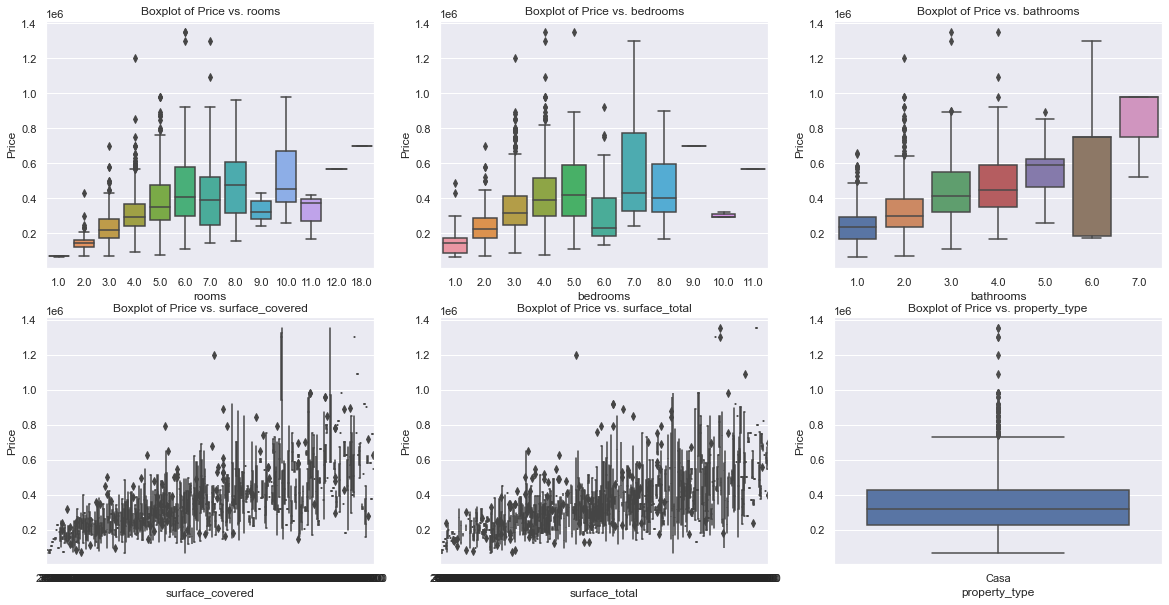

In [ ]:
# Visualización gráfica de la distribución del precio respecto las 6 variables de interés
# (Diagramas de cajas)

plt.figure(figsize=(20,10))
vars_to_plot = ['rooms','bedrooms','bathrooms','surface_covered', 'surface_total', 'property_type']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = var, y='price', data = df_E7_Casa)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

<AxesSubplot:>

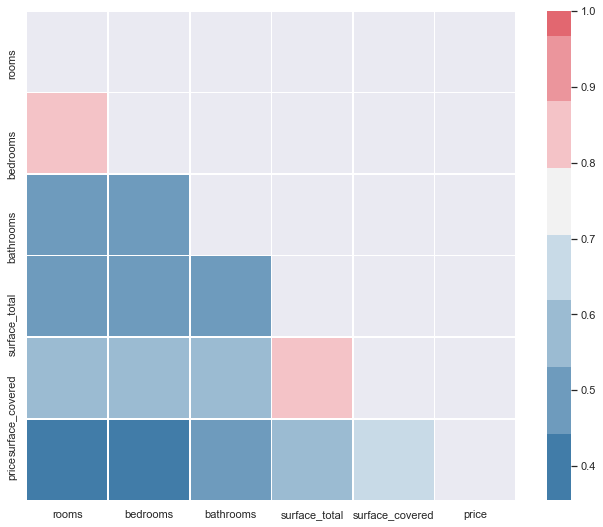

In [ ]:
# Código provisto por la documentación oficial de seaborn para 
# la visualización gráfica de la correlación de un dataframe específico

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_E7_Casa.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.75,
            square=True, linewidths=0.5, cbar_kws={"shrink": 1})

In [ ]:
# Listado de correlación en relación al precio
corr    = df_E7_Casa.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)

price              1.000000
surface_covered    0.651165
surface_total      0.593984
bathrooms          0.499352
rooms              0.415136
bedrooms           0.354908
Name: price, dtype: float64

In [ ]:
corr['price'][neg_cor].sort_values()

Series([], Name: price, dtype: float64)

In [ ]:
### Tipo de propiedad: PH

In [ ]:
# Dataframe específico para las propiedades tipo PH
df_E7_PH=df_6E[df_6E.property_type=='PH']    

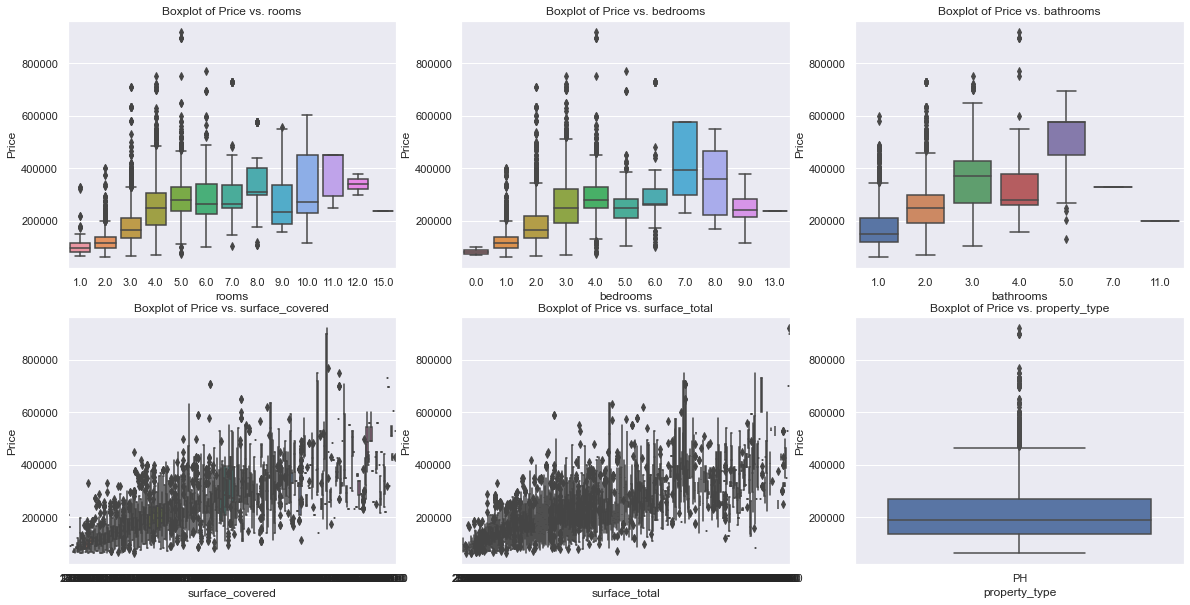

In [ ]:
# Visualización gráfica de la distribución del precio respecto las 6 variables de interés
# (Diagramas de cajas)

plt.figure(figsize=(20,10))
vars_to_plot = ['rooms','bedrooms','bathrooms','surface_covered', 'surface_total', 'property_type']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = var, y='price', data = df_E7_PH)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

<AxesSubplot:>

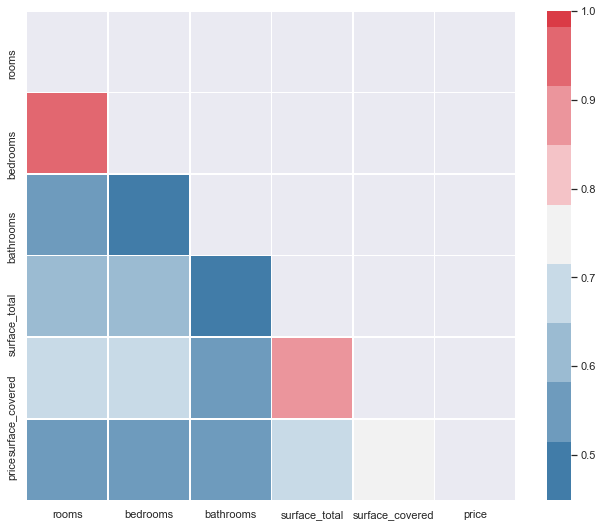

In [ ]:
# Código provisto por la documentación oficial de seaborn para 
# la visualización gráfica de la correlación de un dataframe específico

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_E7_PH.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.75,
            square=True, linewidths=0.5, cbar_kws={"shrink": 1})

In [ ]:
# Listado de correlación en relación al precio
corr    = df_E7_PH.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)

price              1.000000
surface_covered    0.736858
surface_total      0.684223
rooms              0.546147
bedrooms           0.541101
bathrooms          0.539464
Name: price, dtype: float64

In [ ]:
corr['price'][neg_cor].sort_values()

Series([], Name: price, dtype: float64)

### Análisis y conclusiónes 7. Correlaciones.

Acorde la información presentada podemos resaltar los siguientes comportamientos: 

**En relación con las distribuciones** (aunque se presenta a manera de ejemplo la distribución del conjunto “todas las propiedades” el comportamiento descrito corresponde a todos los subgrupos de tipos de propiedad):

1. Price vs rooms: independientemente del tipo de propiedad se ve que existe una tendencia a la linealidad para las propiedades de hasta 6 rooms (esto basado en sus cuartiles).
2. Price vs bedrooms: independientemente del tipo de propiedad se ve que existe una tendencia a la linealidad para las propiedades de hasta 4 bedrooms (esto basado en sus cuartiles).
3. Price vs bathrooms: independientemente del tipo de propiedad se ve que existe una tendencia a la linealidad para las propiedades de hasta 5 bathrooms (esto basado en sus cuartiles).
4. Price vs surface coverd: independientemente del tipo de propiedad se ve que existe una tendencia al incremento con la extensión de la superficie. 
5. Price vs surface total: independientemente del tipo de propiedad se ve que existe una tendencia al incremento con la extensión de la superficie. 
6. Price vs tipo de propiedad: aunque en relación con lo cuartiles puede observarse que en general las propiedades con mayor costo son las casas, hay una gran cantidad de departamentos con valores que superan el de las casas con mayor costo.

![image.png](attachment:0c7e86de-0ae6-4502-96e5-ebf2fad3683e.png)

**En relación con los valores de correlación:**

1. Surfacetotal y surfacecover: independientemente del tipo de propiedad se ve que entre las variables seleccionadas las que mayor correlación presentan con el precio son las variables de superficie, en mayor proporción siempre la superficie cubierta. Es decir que de todo el conjunto de variables estas se consideran las que mejor pueden predecir el precio de los inmuebles bajo una aproximación lineal.
2. Tipo de propiedad: Haciendo el análisis por tipo de propiedad puede observarse que independientemente de la variable la correlación con el precio es mayor en la propiedades de tipo departamento y es menor en las propiedades de tipo casa.

![image.png](attachment:3fa001d9-4837-4ea0-a3db-c95e5c2c8eba.png)

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Respuesta 2.1. Desafío.

**Pregunta a responder:** ¿Cual es la distribución de precios acorde al barrio de Buenos Aires en relación con las siguientes 4 variables? 
- surface_total
- surface_covered
- property_type
- rooms

Emplearemos para ello un dataset que contenga además de los filtros ya sugeridos en los numerales anteriores, unos que tengan en cuenta también las variables descritas en el numeral anterior para los cuales encontramos unas aparentes relaciones de linealidad (rooms <= 6, beedrooms <= 4, y bathrooms <= 5). 

In [ ]:
# Cargamos el dataset
df_properati=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
df_ex_02=df_properati[(df_properati.l2 == 'Capital Federal') & 
                      (df_properati.property_type.isin(['Departamento','Casa','PH'])) & 
                      (df_properati.surface_total>=df_properati.surface_covered) &
                      (df_properati.surface_total>=15) & (df_properati.surface_total<=1000) &
                      (df_properati.price <=4000000 ) &
                      (df_properati.rooms <= 6) &
                      (df_properati.bedrooms <= 4) &
                      (df_properati.bathrooms <= 5)
                     ].dropna().reset_index(drop=True)
df_ex_02.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
1,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
2,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
3,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
4,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


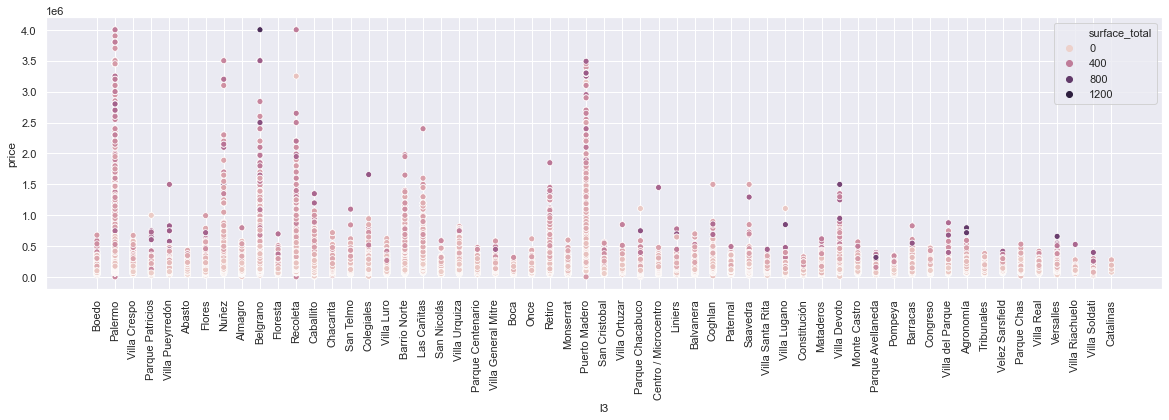

In [ ]:
# Distribución de precios acorde al barrio de Buenos Aires en relación con surface_total
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_ex_02, x = "l3", y = "price", hue='surface_total')
plt.xticks(rotation=90)
plt.show()

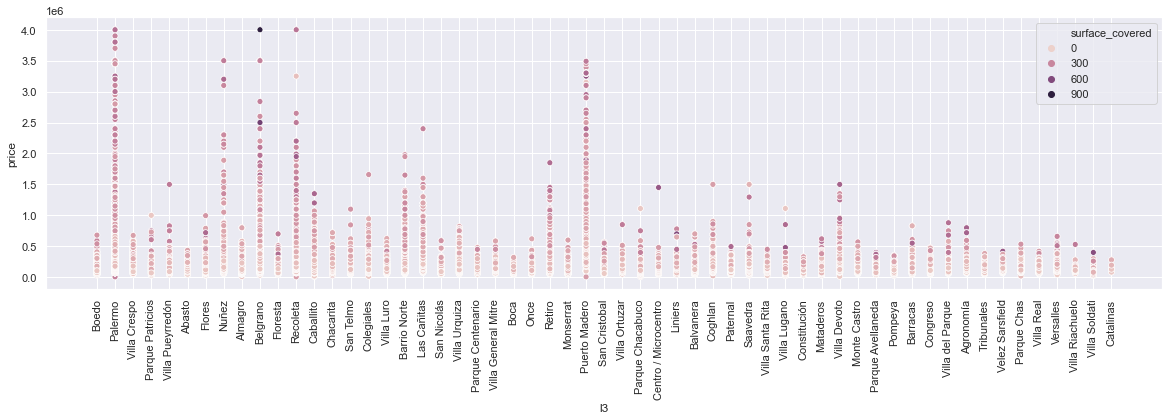

In [ ]:
# Distribución de precios acorde al barrio de Buenos Aires en relación con surface_covered
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_ex_02, x = "l3", y = "price", hue='surface_covered')
plt.xticks(rotation=90)
plt.show()

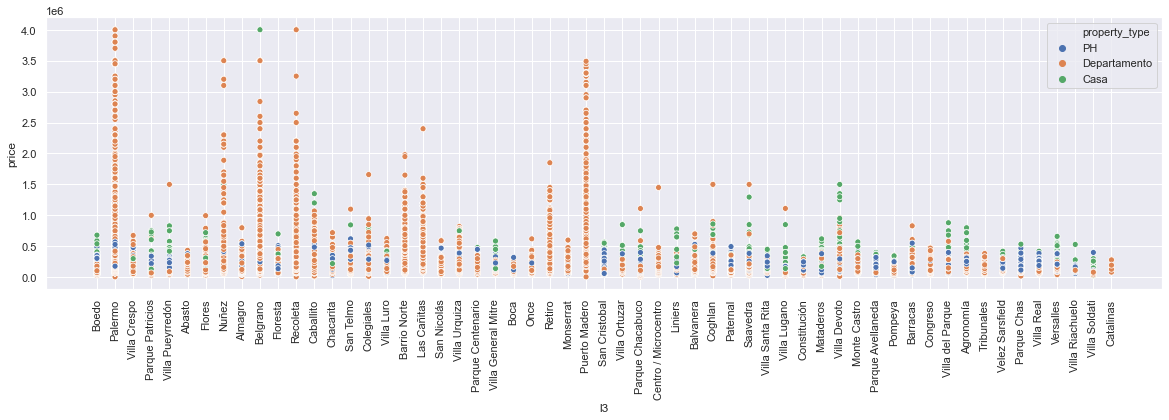

In [ ]:
# Distribución de precios acorde al barrio de Buenos Aires en relación con property_type
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_ex_02, x = "l3", y = "price", hue='property_type')
plt.xticks(rotation=90)
plt.show()

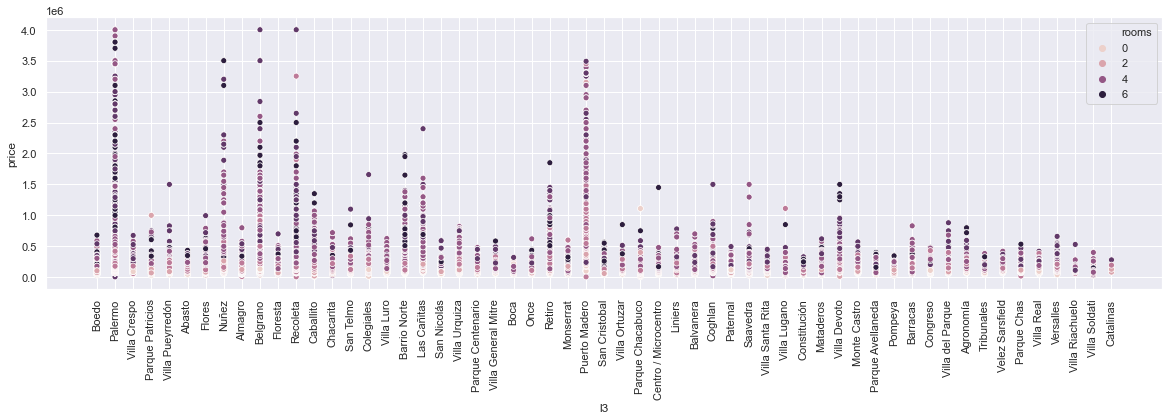

In [ ]:
# Distribución de precios acorde al barrio de Buenos Aires en relación con rooms
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_ex_02, x = "l3", y = "price", hue='rooms')
plt.xticks(rotation=90)
plt.show()

Acorde al tipo de propiedad puede observarse que los 5 barrios que presentan mayores valores (Palermo, Nuñez, Belgrano, Recoleta y Puerto Madero) presentan las siguientes características:
- El tipo de propiedad que más se publica corresponde con departamentos
- Gran cantidad de dichas propiedades tienen áreas inferiores a los 300 metros cuadrados

**Tipo de sesgo:** Dado que toda la información con que se trabaja es únicamente la información que ha sido cargada a través del portal properati, esta puede no estar correspondiendo con la población objetivo en todos los barrios de interés. Un ejemplo puntual de ello es que en los barrios más pobres los anuncios se moverán más por voz a voz o avisos sobre las propiedades y no aparecerán aquí referenciado. En general podemos definir el sesgo como sesgo de selección por este tipo de muestreo que se presenta.

**Cuan generalizable es la respuesta:** puede tomarse únicamente generalizable en barrios o sectores en los cuales se determine que la muestra es representativa del conjunto de propiedades en dicho sector. Puede que existan sectores en los cuales el mecanismo más apropiado de venta corresponda con la publicación web y la muestra de properati sería un buen ejemplo de ello.


**¿Necesito información complementaria? ¿cómo la obtendría?:** Debería evaluar por sector cuál es el mecanismo de publicación más recurrente, y complementar a partir de la información obtenida. En algunos casos puede ser por trabajo en campo (inspeccionar propiedades directamente en esos barrios), anuncios de prensa, información de financieras en relación con títulos de propiedad, etc.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

1. Elegir una métrica apropiada para evaluar los resultados de los modelos.
2. Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
3. Realizar un Train/Test split de los datos.
4. Generar un modelo *benchmark* y evaluarlo.
5. Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
6. Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
7. Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
8. Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
9. Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
# Cargamos el dataset sugerido
df_properati=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
# Filtrado 1
df_mac_ler=df_properati[(df_properati.l2 == 'Capital Federal') & (df_properati.property_type.isin(['Departamento','Casa','PH']))]
print(df_mac_ler.shape)

(91485, 19)


In [ ]:
# Filtrado 2
df_mac_ler=df_mac_ler[(df_mac_ler.surface_total>=15) & (df_mac_ler.surface_total<=1000)]
print(df_mac_ler.shape)

(82405, 19)


In [ ]:
# Filtrado 3
df_mac_ler=df_mac_ler[(df_mac_ler.price<=4000000)]
print(df_mac_ler.shape)

(82373, 19)


In [ ]:
# Filtrado 4 y 5
df_mac_ler=df_mac_ler[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price', 'property_type']].dropna().reset_index(drop=True)
df_mac_ler

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
81014,4.0,3.0,3.0,175.0,111.0,570000.0,PH
81015,3.0,2.0,2.0,144.0,134.0,480000.0,PH
81016,4.0,2.0,2.0,317.0,143.0,530000.0,PH
81017,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


### Respuesta 03. Machine Learning

1. Elegir una métrica apropiada para evaluar los resultados de los modelos.

Dado que el problema es un problema de regresión, propondremos 2 metricas del paquete de metricas que tiene implementado scikitlearn:

![image.png](attachment:88c141ce-abb7-49e4-b94d-b4c197caa070.png)

In [ ]:
# Elegimos las métricas a evaluar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2. Seleccionar las variables predictoras (X) y la variable a predecir (y).

In [ ]:
# Definimos la matríz de variables predictoras X
X = df_mac_ler.loc[:,'rooms':'surface_covered']
X

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
4,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
81014,4.0,3.0,3.0,175.0,111.0
81015,3.0,2.0,2.0,144.0,134.0
81016,4.0,2.0,2.0,317.0,143.0
81017,3.0,2.0,2.0,145.0,145.0


In [ ]:
# Definimos el vector de la variable a predecir 'y'
y = df_mac_ler['price']
y

0         153000.0
1         159000.0
2         125000.0
3         295000.0
4         150000.0
           ...    
81014     570000.0
81015     480000.0
81016     530000.0
81017     420000.0
81018    1470000.0
Name: price, Length: 81019, dtype: float64

3. Realizar un Train/Test split de los datos.

In [ ]:
# Realizamos el train/test split de los datos (30% de los datos)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


4. Generar un modelo benchmark y evaluarlo

In [ ]:
# Tomaremos como benchmark el modelo de regresión lineal

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R cuadrado en Train: {r2_train}')
print(f'R cuadrado en Test: {r2_test}')

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361575
R cuadrado en Train: 0.5517887107017188
R cuadrado en Test: 0.5514864358797202


5. Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

In [ ]:
# Definimos e instanciamos lo modelos 
# (dejaremos tambien el de regresión lineal por si queremos implementar algun cambio)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

6. Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361575
R cuadrado en Train: 0.5517887107017188
R cuadrado en Test: 0.5514864358797202


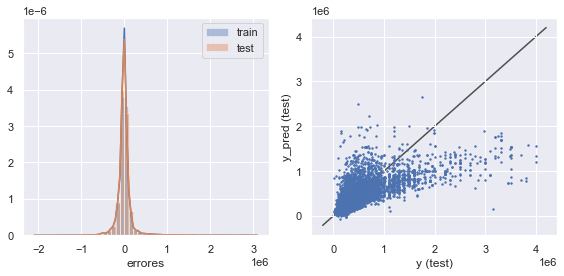

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327
R cuadrado en Train: 0.5844333913686437
R cuadrado en Test: 0.5852162030595955


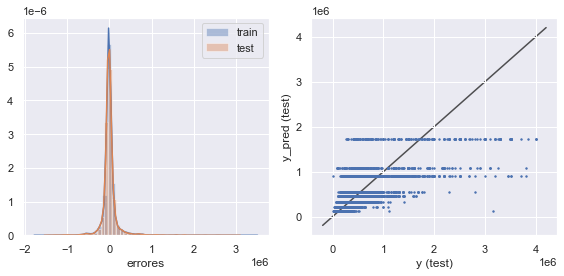

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459
R cuadrado en Train: 0.8337576939918325
R cuadrado en Test: 0.7369544202301519


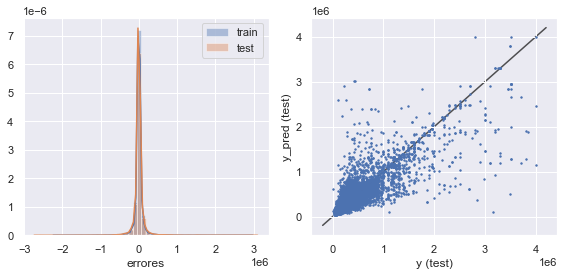

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R cuadrado en Train: {r2_train}')
    print(f'R cuadrado en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Aunque los modelos implementados para el dataset en estudio están distantes de presentar un ajuste lineal significativo para todo el conjunto de variables y de datos (observamos valores de métrica muy altos para la raíz del error cuadrático medio y pequeños para el valor de R cuadrado), en comparativa el modelo que presenta los valores más óptimos bajo los hiper parámetros por defecto entre los tres descritos, es el modelo de vecinos más cercanos (entre los 3 es el que presenta los menores valores de raíz del error cuadrático medio y los mayores valores de R cuadrado).

7. Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

Definiremos a través del parámetro scoring de la curva de validación y de la métrica que deseamos calcular los hiperparametros óptimos para cada modelo:

![image.png](attachment:37d18ca9-6815-49ec-93e1-221214dd0a6b.png)

## Curva de evaluación: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors =5)

**Curva de evaluación: KNN (optimización para la métrica: Raíz del error cuadrático medio)**

In [ ]:
# Utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

#le indicamos la lista de k's para testear el hiperparametro
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
#le pasamos a la funcion
#estimador= lo guardamos en la variable clf_knn
#X= matriz de caracteristicas
#y=variable target
#param_name= el nombre del hiperparametro del modelo que quiero testear, en nuestro caso la cantidad de vecinos
#param_range=la variable donde guardamos la lista con los valores que queremos testear, en este caso la guardamos en la variable k_vecinos 
#cv=la funcion parte los datos en tantos conjuntos como dice este parametro y entrena con todas las partes menos con una que es con la que testea
#   y repite esto como partes tenga, dejo una imagen abajo para que ejemplifique este punto.
#observacion=si la opcion cv es 1 y le pasamos en lugar de X_train toda la matriz de caracteristicas y en lugar de y_train todo el vector target
#            es lo que hicimos a mano en la practica
train_prec, eval_prec = validation_curve(estimator=clf_knn, X=X_train,
                                        y=y_train, scoring="neg_root_mean_squared_error", param_name='n_neighbors',
                                        param_range=k_vecinos, cv=5)

#como para cada hiperparametro tengo 5 errores de train y 5 de test se queda con la media y con el desvio para cada valor de hiperparametro
train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

C:\Users\Alexander\.conda\envs\ds-online-40\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


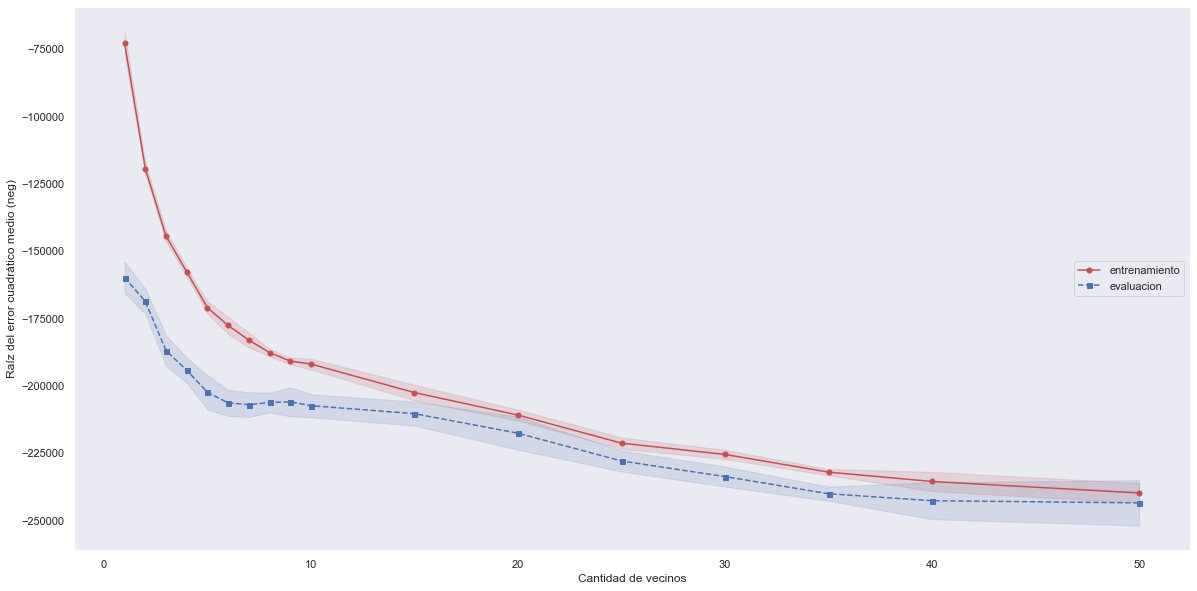

In [ ]:
# Graficando las curvas
plt.figure(figsize=(20,10))
plt.plot(k_vecinos, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(k_vecinos, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(k_vecinos, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(k_vecinos, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Raíz del error cuadrático medio (neg)')
plt.show()

**Curva de evaluación: KNN (optimización para la métrica: R cuadrado)**

In [ ]:
# Utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

#le indicamos la lista de k's para testear el hiperparametro
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
#le pasamos a la funcion
#estimador= lo guardamos en la variable clf_knn
#X= matriz de caracteristicas
#y=variable target
#param_name= el nombre del hiperparametro del modelo que quiero testear, en nuestro caso la cantidad de vecinos
#param_range=la variable donde guardamos la lista con los valores que queremos testear, en este caso la guardamos en la variable k_vecinos 
#cv=la funcion parte los datos en tantos conjuntos como dice este parametro y entrena con todas las partes menos con una que es con la que testea
#   y repite esto como partes tenga, dejo una imagen abajo para que ejemplifique este punto.
#observacion=si la opcion cv es 1 y le pasamos en lugar de X_train toda la matriz de caracteristicas y en lugar de y_train todo el vector target
#            es lo que hicimos a mano en la practica
train_prec, eval_prec = validation_curve(estimator=clf_knn, X=X_train,
                                        y=y_train, scoring="r2", param_name='n_neighbors',
                                        param_range=k_vecinos, cv=5)

#como para cada hiperparametro tengo 5 errores de train y 5 de test se queda con la media y con el desvio para cada valor de hiperparametro
train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

C:\Users\Alexander\.conda\envs\ds-online-40\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


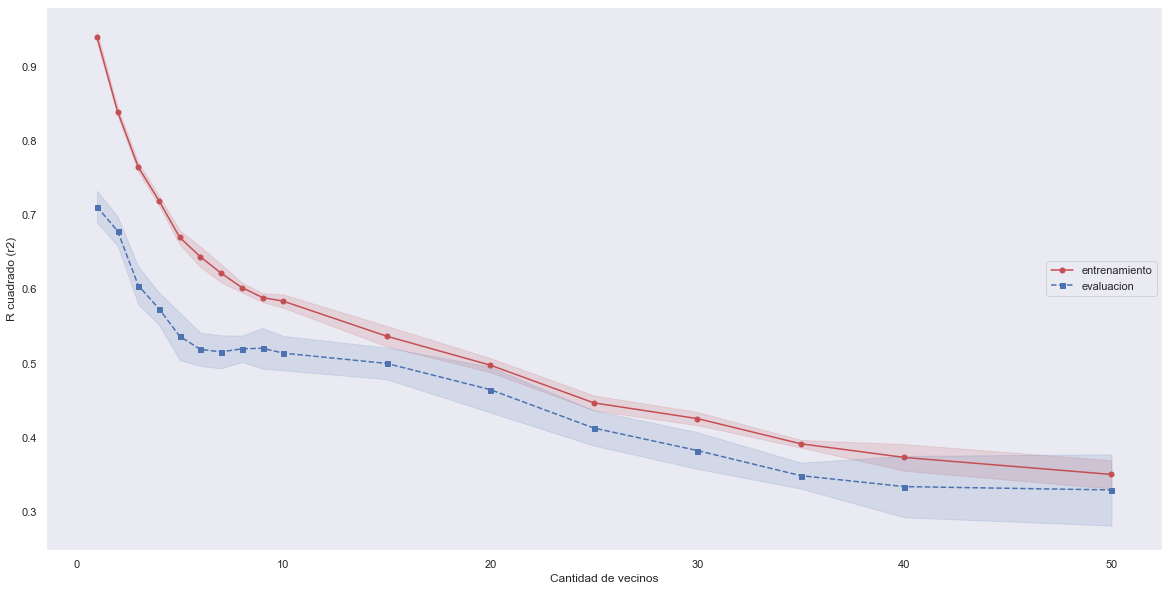

In [ ]:
# Graficando las curvas
plt.figure(figsize=(20,10))
plt.plot(k_vecinos, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(k_vecinos, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(k_vecinos, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(k_vecinos, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Cantidad de vecinos')
plt.ylabel('R cuadrado (r2)')
plt.show()

## Curva de evaluación: Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

**Curva de evaluación: Arbol de decisión (optimización para la métrica: Raíz del error cuadrático medio)**

In [ ]:
# Utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
train_prec, eval_prec = validation_curve(estimator=clf_tree, X=X_train,
                                        y=y_train,scoring="neg_root_mean_squared_error", param_name='max_depth',
                                        param_range=max_depths, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

C:\Users\Alexander\.conda\envs\ds-online-40\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


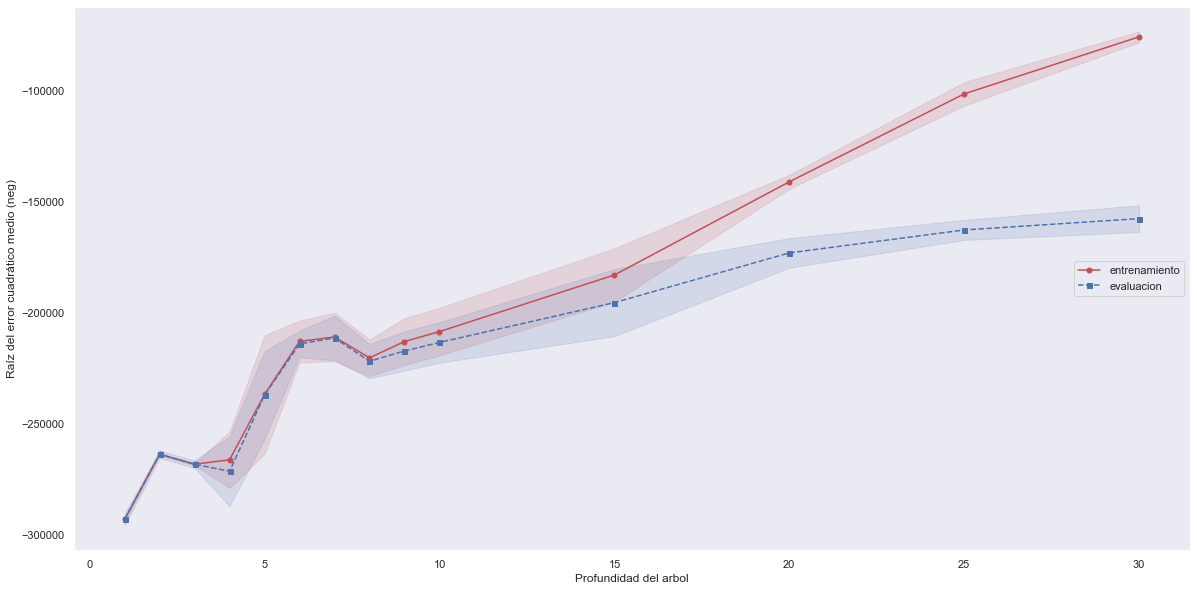

In [ ]:
# Graficando las curvas
plt.figure(figsize=(20,10))
plt.plot(max_depths, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(max_depths, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_depths, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(max_depths, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Raíz del error cuadrático medio (neg)')
plt.show()

**Curva de evaluación: Arbol de decisión (optimización para la métrica: R cuadrado)**

In [ ]:
# Utilizando validation curve de sklearn
from sklearn.model_selection import validation_curve

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
train_prec, eval_prec = validation_curve(estimator=clf_tree, X=X_train,
                                        y=y_train,scoring="r2", param_name='max_depth',
                                        param_range=max_depths, cv=5)

train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

C:\Users\Alexander\.conda\envs\ds-online-40\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


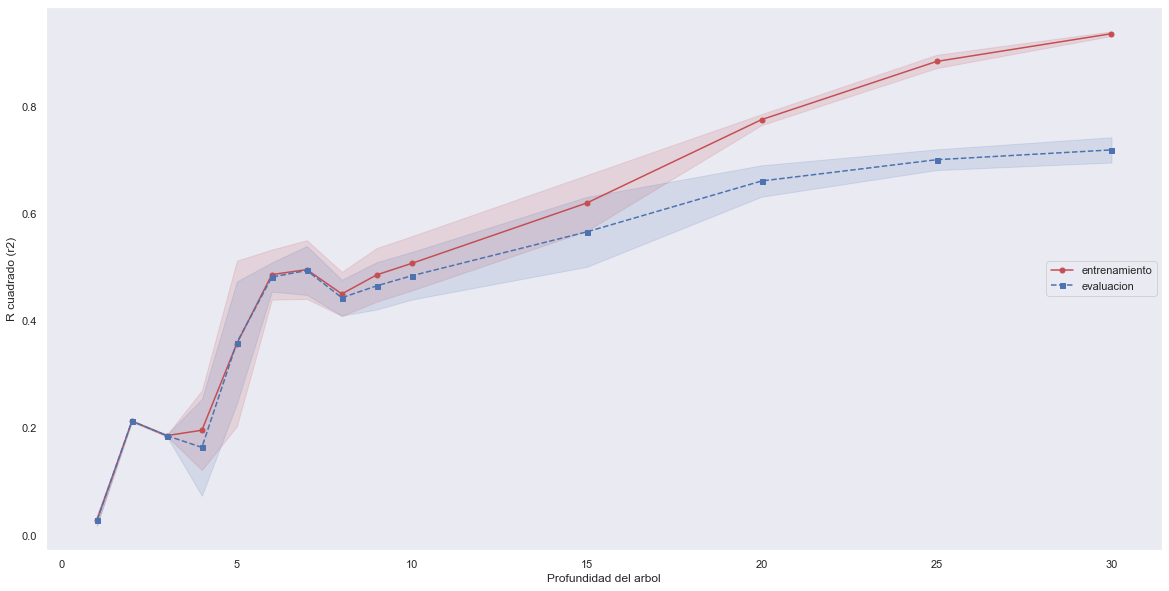

In [ ]:
# Graficando las curvas
plt.figure(figsize=(20,10))
plt.plot(max_depths, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(max_depths, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_depths, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(max_depths, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Profundidad del arbol')
plt.ylabel('R cuadrado (r2)')
plt.show()

8. Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 

Dado que el interés a partir de las curvas de evaluación es encontrar los hiperparametros que permitan mejorar las métricas, lo que en nuestro caso específico traduce minimizar la raíz del error cuadrático medio y maximizar el valor del R cuadrado, y que al mismo tiempo no se estén presentando diferencias significativas entre la predicción en los target de los datos de entrenamiento y de los datos de validación, encontramos que los hiperparametros que mejor cumplen en cada modelo son los siguientes: 

- **KNN**: n_neighbors= 15. A partir de tal valor puede sospecharse que el modelo puede empezar a presentar  sobreajuste pues el valor para los datos de entrenamiento empieza a diferir del valor de los datos de evaluación. Para ambas métricas el valor del hiperparámetro presenta el mismo comportamiento.
- **Árbol de decisión**: max_depth = 7. A partir de tal valor puede sospecharse que el modelo puede empezar a presentar  sobreajuste pues el valor para los datos de entrenamiento empieza a diferir del valor de los datos de evaluación. Para ambas métricas el valor del hiperparámetro presenta el mismo comportamiento.


**Comparación de modelos respecto a mejor hiperparametro elegido: Arbol de decisión y KNN (métrica: R cuadrado)**

![image.png](attachment:dae1844e-3abb-4acf-9af6-da8457a1f354.png)

Podemos ver que para ambos modelos el valor de R cuadrado bajo el mejor hiperparámetro elegido para cada uno está en torno a 0.5 por lo cual no podría determinarse con certeza que uno de los dos métodos funciona mejor. Ambos presentan un desempeño similar.

**Comparación de modelos respecto a mejor hiperparametro elegido: Arbol de decisión y KNN (Raíz del error cuadrático medio)**

![image.png](attachment:a011651e-fc2a-4b79-9cb1-800024da5496.png)

Podemos ver que para ambos modelos el valor del error cuadrático medio bajo el mejor hiperparámetro elegido para cada uno está en torno a 20000 por lo cual no podría determinarse con certeza que uno de los dos métodos funciona mejor. Ambos presentan un desempeño similar.

9. Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Hemos evaluado a manera de ejercicio los modelos de KNN y Árbol de decisión para un amplio dataframe que contiene propiedades con características muy dispares entre sí, y aun para los mejores hiperparámetros elegidos los valores para las métricas están lejos de ser óptimos. 

Esto puede deberse a varias características que podrían tenerse en cuenta: 

- **Clusterización y modelado por cluster:** Podrían implementarse los mismos modelos pero en subgrupos más pequeños que permitieran reducir la dispersión de las variables respecto a las características (clusterización). Como ejemplo, si tomamos departamentos de 2 o 3 habitaciones, de hasta 3 baños y ubicados todos en el mismo barrio, seguramente el modelo presentaría un mucho mejor ajuste. Así por ejemplo si se emplea el modelo de regresión lineal, se tendría una pendiente diferente para cada cluster, y aunque esto complejiza el modelo podrían tener resultados mucho mejores respecto a las métricas evaluadas.

- **Inclusión de variables omitidas en el modelo:** como ya se ha mencionado a lo largo del proyecto, la variable ubicación (barrio) es determinante y debe ser tenida en cuenta en el modelo. Quizá sea la primera característica a ser tenida en el proceso de clusterización antes mencionado. Esta variable está incluida en el dataset por lo cual no sería necesario un trabajo adicional para poder empezar a trabajar con ella. De manera adicional podrían incluirse otras variables como la antigüedad que también juegan un importante factor pero es una variable de la cual debería conseguirse información pues no se encuentra en el dataset de prueba.

En conclusión aunque la evaluación de los modelos en un dataframe con características tan dispares nos permite ejercitarnos en términos de su implementación, es una aproximación que simplifica de una manera muy drástica el problema que deseamos resolver. Necesitaremos herramientas adicionales más amplias como por ejemplo la clusterización para mejorar nuestras métricas y con ello el rendimiento de nuestros modelos.
